## ***Unequal Narratives? Investigating Media Bias in the Israel-Palestine Conflict***

**Subtopics:**
* [Data Preparation and Preprocessing](#Data-Preparation-and-Preprocessing)
* [Sentiment Analysis and Keyword Frequency of Headlines](#Sentiment-Analysis-and-Keyword-Frequency-of-Headlines)
* [Event Salience: Coverage vs. Casualties](#Event-Salience-Coverage-vs-Casualties)

### Installation of requirements 

The following Python libraries are required for this project:

##### Data Handling & Numerical Computation
- [`pandas`](https://pandas.pydata.org/docs/index.html) – A library for creating and manipulating tabular data, offering data structures and analysis tools.
- [`numpy`](https://numpy.org/) – A fundamental package for numerical computing, providing support for arrays, matrices, and mathematical functions.

##### Data Visualization
- [`matplotlib`](https://matplotlib.org/) – A widely-used plotting library for creating static, animated, and interactive visualizations.
- [`seaborn`](https://seaborn.pydata.org/) – A high-level visualization library built on `matplotlib`, offering better aesthetics and seamless integration with `pandas`.
- [`wordcloud`](https://pypi.org/project/wordcloud/) – A library for generating word clouds to visualize word frequency distributions in text data.

##### Machine Learning & Deep Learning
- [`scikit-learn`](https://scikit-learn.org/stable/) – A comprehensive library with various machine learning algorithms for classification, regression, clustering, and more.
- [`torch`](https://pytorch.org/) – A deep learning framework primarily used for building and training neural networks, often serving as the backend for transformer models.
- [`transformers`](https://pypi.org/project/transformers/) – A library by Hugging Face for leveraging pre-trained transformer models (e.g., BERT, GPT) for natural language processing tasks.

##### Natural Language Processing (NLP)
- [`nltk`](https://www.nltk.org/) – A library offering tools for tokenization, stemming, and other NLP techniques.
- [`vaderSentiment`](https://pypi.org/project/vaderSentiment/) – A sentiment analysis tool optimized for short texts, such as social media posts and headlines.
- [`spacy`](https://spacy.io/) – An advanced NLP library with efficient tokenization, named entity recognition, dependency parsing, and more.

In [ ]:
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install seaborn
! pip install wordcloud
! pip install scikit-learn
! pip install torch transformers
! pip install nltk vaderSentiment transformers
! pip install spacy

### Import requirements
The cell below imports all necessary dependancies.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import itertools
import spacy
spacy.cli.download("en_core_web_sm")

from wordcloud import WordCloud
from collections import Counter, defaultdict
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from matplotlib.colors import LinearSegmentedColormap
from pathlib import Path

## **Data Preparation and Preprocessing**

### Data cleaning

Link for the search query: [`Media Cloud Search Query`](https://search.mediacloud.org/search?qs=israe*%2520OR%2520palestin*%2520OR%2520hamas%2520OR%2520IDF&start=10-07-2023&end=01-07-2024&p=onlinenews-mediacloud&ss=1092%252C1%252C1095%252C7%252C2%252C101&cs=&any=any&name=israe*%20OR%20palestin*%20OR%20hamas%20OR%20IDF&edit=false) 

We obtained our dataset using the link above. We limited the query to 6 media outlets, one year time (07-10-2023 - 07-10-2024), and specified keywords (israe* OR palestin* OR hamas OR IDF) that needed to be included in the articles that came up.


In [145]:
data_path = Path('..') / 'data' / 'data.csv'
data = pd.read_csv(data_path)
data

,id,indexed_date,language,media_name,media_url,publish_date,title,url
0,609b49fdea2e02b3da9be8594a1e71daf839cc31cf184d...,2025-01-06 18:18:20.886953,en,nytimes.com,nytimes.com,2024-10-07,"Campuses Are Calmer, but They Are Not Normal, ...",https://www.nytimes.com/2024/10/07/us/campus-c...
1,e88291a5c2b82ede03a526071c1d1b8fa77e23fcec1edd...,2024-10-07 18:24:01.615866,en,nypost.com,nypost.com,2024-10-07,"Trump hints that he’s open to Richard Grenell,...",https://nypost.com/2024/10/07/us-news/donald-t...
2,f810fcfd715f8c7412f8da51c992b140f6db253abac936...,2024-10-07 13:28:40.202129,en,foxnews.com,foxnews.com,2024-10-07,Hezbollah rocket attack on Israel hits Haifa f...,https://www.foxnews.com/world/hezbollah-rocket...
3,a360fa0abf34985b9a1db2e169dd9349f8e4e60d559e9f...,2024-10-07 23:23:57.316841,en,nypost.com,nypost.com,2024-10-07,"Kamala Harris, Emhoff plant tree for Oct. 7 vi...",https://nypost.com/2024/10/07/us-news/kamala-h...
4,1a06b76f8c6516a469b4a32a2f898b595487018e380483...,2024-10-08 06:33:09.401765,en,cnn.com,cnn.com,2024-10-07,Israeli Amb: ‘We will not heal’ until hostages...,https://www.cnn.com/2024/10/07/world/video/the...
...,...,...,...,...,...,...,...,...
25261,fb62dcff0bed5b4e07b6f3b453d399033142b144178a46...,2024-02-19 16:45:53.602867,en,washingtonpost.com,washingtonpost.com,2023-10-07,This is Israel’s 9/11. The consequences will b...,https://www.washingtonpost.com/opinions/2023/1...
25262,b68f94c49afee4ad2427bc4a5a0a0a15d9ce67bf45b4fe...,2024-02-19 16:10:13.944341,en,nytimes.com,nytimes.com,2023-10-07,Israel’s defense failures may change strategy ...,https://www.nytimes.com/2023/10/07/world/middl...
25263,435cd12f57471cb4753902a4a4ea17cbaec8754465f728...,2024-02-19 17:45:25.642968,en,nytimes.com,nytimes.com,2023-10-07,Gaza Has Suffered Under 16-Year Blockade,https://www.nytimes.com/2023/10/07/world/middl...
25264,682b2869c252ea3d5e134e14452bac72cf50db359fd156...,2024-02-19 17:15:09.644319,en,washingtontimes.com,washingtontimes.com,2023-10-07,Biden ready to offer ‘all means of appropriate...,https://www.washingtontimes.com/news/2023/oct/...


Filtering by keywords: We check if the title column contains any of the needed words, ignoring case sensitivity and handling missing values.

In [163]:
# chosen keywords
keywords = ["Gaza", "Israel", "Palestine", "West Bank", "Palestinian", "Hamas", "IDF", "Hezbollah", "Israeli"]
data_filtered = data[data['title'].str.contains('|'.join(keywords), case=False, na=False)]
data_filtered = data_filtered[data_filtered['language'] == 'en']

# Drop the 'id' and 'language' columns
data_cleaned = data_filtered.drop(columns=['id', 'indexed_date', 'language', 'media_url', 'url'])

data_cleaned = data_cleaned.rename(columns={
    "media_name": "Media Name",
    "publish_date": "Publish Date",
    "title": "Title",
})

cleaned_file_path = Path('..') / 'data' / 'data_cleaned_filtered.csv'
data_cleaned.to_csv(cleaned_file_path, index=False)

data_cleaned

,Media Name,Publish Date,Title
2,foxnews.com,2024-10-07,Hezbollah rocket attack on Israel hits Haifa f...
4,cnn.com,2024-10-07,Israeli Amb: ‘We will not heal’ until hostages...
6,cnn.com,2024-10-07,Family member of Israeli hostages: ‘We never l...
7,nypost.com,2024-10-07,Israel establishes new military zone around Le...
10,nypost.com,2024-10-07,Oct. 7 anniversary live updates: Thousands of ...
...,...,...,...
25258,nytimes.com,2023-10-07,‘The Children Were Terrified.’ Fear Grips Isra...
25261,washingtonpost.com,2023-10-07,This is Israel’s 9/11. The consequences will b...
25262,nytimes.com,2023-10-07,Israel’s defense failures may change strategy ...
25263,nytimes.com,2023-10-07,Gaza Has Suffered Under 16-Year Blockade


### Analysis of Media Coverage
The bar chart below illustrates the number of posts published by six major US media outlets (CNN, NBC, NY Post, NY Times, Fox, and Wall Street Journal) related to Gaza, Israel, or Palestine during the selected timeframe. This analysis highlights variations in the volume of coverage among these outlets, offering insights into their reporting focus on the topic.

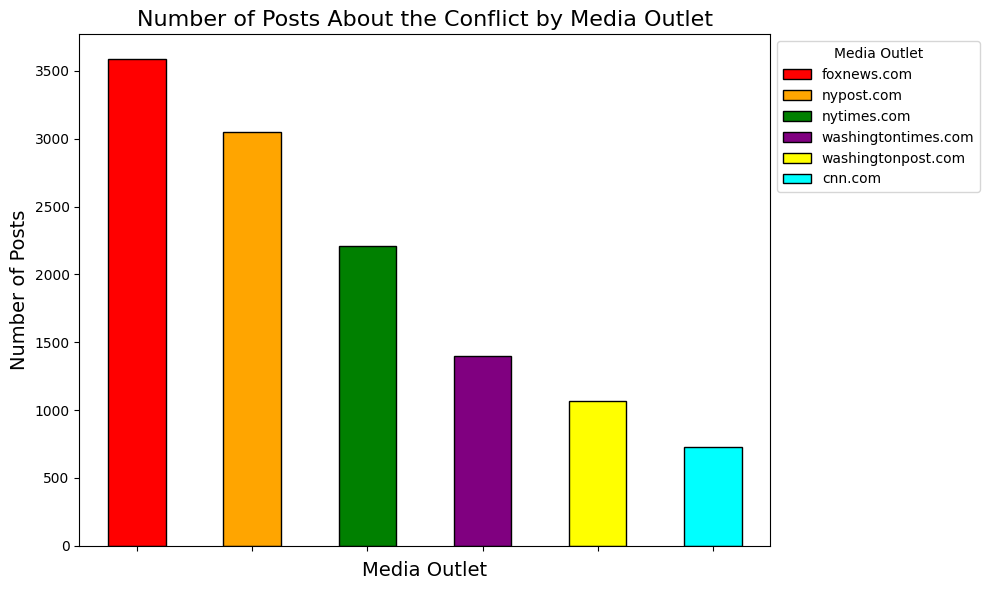

In [164]:
media_counts_conflict = data_cleaned['Media Name'].value_counts()

color_map = {
    'foxnews.com': 'red',
    'cnn.com': 'cyan',
    'nytimes.com': 'green',
    'washingtontimes.com': 'purple',
    'nypost.com': 'orange',
    'washingtonpost.com': 'yellow'
}

colors = media_counts_conflict.index.map(color_map)

plt.figure(figsize=(10, 6))
bars = media_counts_conflict.plot(kind='bar', color=colors, edgecolor='black')

plt.xlabel("Media Outlet", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.title("Number of Posts About the Conflict by Media Outlet", fontsize=16)
plt.xticks(ticks=np.arange(len(media_counts_conflict)), labels=[""] * len(media_counts_conflict))
plt.legend(bars.patches, media_counts_conflict.index, title='Media Outlet', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

The function `clean_media_data` reads a CSV file containing media data, filters it to include only English-language entries, and drops unnecessary columns for streamlined analysis. The function then renames specific columns to more descriptive labels and counts the number of entries per media outlet, printing the results. Finally, it returns the cleaned DataFrame.

In [148]:
def clean_media_data(file_path):
    """
    Reads and cleans a CSV of media data, filters for English entries,
    renames columns, counts media entries and returns the cleaned DataFrame
    and a dictionary of media counts.
    """
    data = pd.read_csv(file_path)

    data_cleaned = data[data['language'] == 'en']
    data_cleaned = data_cleaned.drop(columns=['id', 'indexed_date', 'media_url', 'url', 'language'])
    data_cleaned = data_cleaned.rename(columns={
        "media_name": "Media Name",
        "publish_date": "Publish Date",
        "title": "Title",
    })

    media_counts = data_cleaned['Media Name'].value_counts()
    total_entries = media_counts.to_dict()
    
    for media, count in total_entries.items():
        print(f"Number of entries for {media}: {count}")
    
    return data_cleaned, total_entries

Read in the news CSV files from our chosen media outlets.

In [149]:
fox_file_path = Path('..') / 'data' / 'fox.csv'
fox_cleaned, fox_entries = clean_media_data(fox_file_path)

cnn_file_path = Path('..') / 'data' / 'cnn.csv'
cnn_cleaned, cnn_entries = clean_media_data(cnn_file_path)

nypost_file_path = Path('..') / 'data' / 'nypost.csv'
nypost_cleaned, nypost_entries = clean_media_data(nypost_file_path)

nytimes_file_path = Path('..') / 'data' / 'nytimes.csv'
nytimes_cleaned, nytimes_entries = clean_media_data(nytimes_file_path)

washingtonpost_file_path = Path('..') / 'data' / 'washingtonpost.csv'
washingtonpost_cleaned, washingtonpost_entries = clean_media_data(washingtonpost_file_path)

washingtontimes_file_path = Path('..') / 'data' / 'washingtontimes.csv'
washingtontimes_cleaned, washingtontimes_entries = clean_media_data(washingtontimes_file_path)

Number of entries for foxnews.com: 52599
Number of entries for cnn.com: 9351
Number of entries for nypost.com: 71485
Number of entries for nytimes.com: 43011
Number of entries for washingtonpost.com: 16747
Number of entries for washingtontimes.com: 29683


This code segment performs a **comparative analysis of media coverage** by normalizing conflict-related entries against total entries for each media outlet. It calculates a normalized ratio for each outlet by dividing the number of conflict entries by the total entries, then visualizes the data using a bar chart. The chart compares normalized values across media outlets.

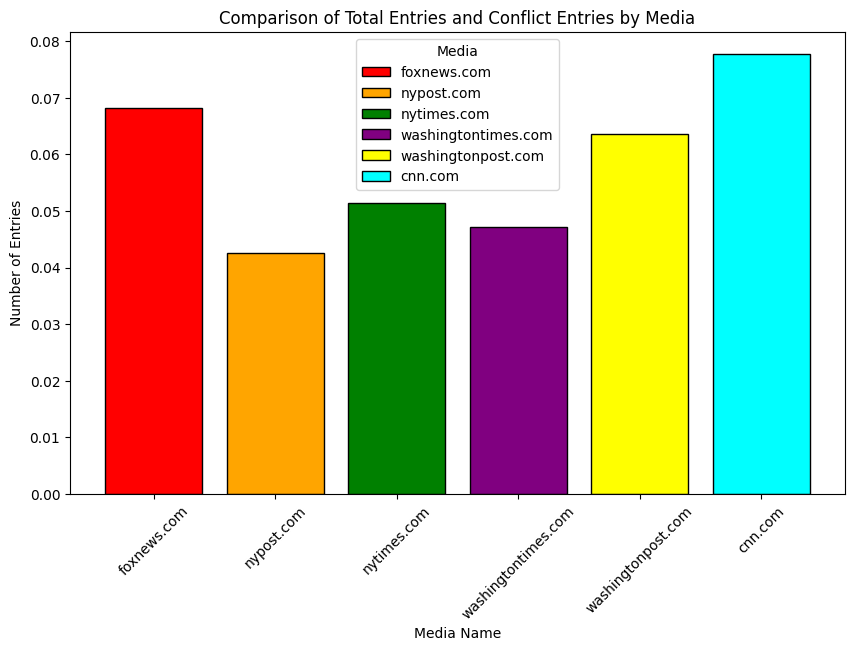

In [150]:
total_entries = {**fox_entries, **cnn_entries, **nypost_entries, 
                 **nytimes_entries, **washingtonpost_entries, **washingtontimes_entries}

normalized_data = {
    key: media_counts_conflict.to_dict()[key] / total_entries[key]
    for key in media_counts_conflict.to_dict()
}

fig, ax = plt.subplots(figsize=(10, 6))
for media in normalized_data:
    ax.bar(media, normalized_data[media], color=color_map[media], label=media, edgecolor='black')

ax.set_xlabel('Media Name')
ax.set_ylabel('Number of Entries')
ax.set_title('Comparison of Total Entries and Conflict Entries by Media')
ax.legend(title='Media')
plt.xticks(rotation=45)
plt.show()

## **Sentiment Analysis and Keyword Frequency of Headlines**

### Sentiment Score Calculations

This plot shows the average sentiment score for each media outlet, with different colors representing each outlet. It provides an overview of the tone (positive, neutral, or negative) in the media's reporting on the Israel-Palestine conflict.


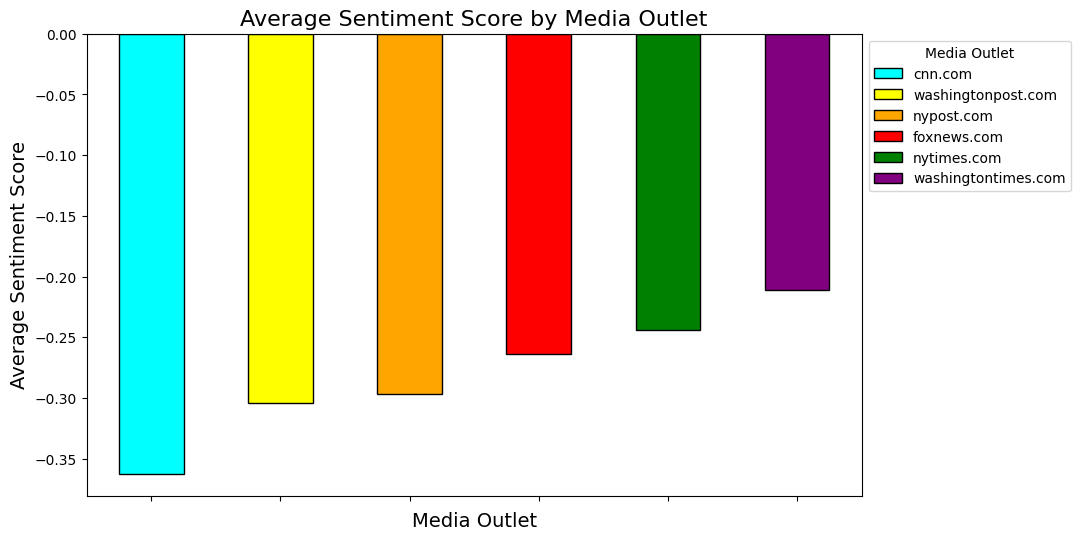

In [165]:
analyzer = SentimentIntensityAnalyzer()

data_cleaned['Sentiment Score'] = data_cleaned['Title'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
data_cleaned

avg_sentiment_by_outlet = data_cleaned.groupby('Media Name')['Sentiment Score'].mean().sort_values()

# Create a list of colors according to the color_map
colors = avg_sentiment_by_outlet.index.map(color_map)

# Plot the average sentiment by outlet with specific colors
plt.figure(figsize=(10, 6))
bars = avg_sentiment_by_outlet.plot(kind='bar', color=colors, edgecolor='black')

plt.xlabel("Media Outlet", fontsize=14)
plt.ylabel("Average Sentiment Score", fontsize=14)
plt.title("Average Sentiment Score by Media Outlet", fontsize=16)
plt.xticks(ticks=np.arange(len(media_counts_conflict)), labels=[""] * len(media_counts_conflict))
plt.legend(bars.patches, avg_sentiment_by_outlet.index, title='Media Outlet', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

The following plot allows us to observe how the sentiment regarding the Israel-Palestine conflict has changed over time, providing insights into the tone of media coverage on a monthly basis.

In [166]:
# Define special events and their colors
special_events = {
    "7th October Attack": ("2023-10-07", "red"),
    "Al Ahli Hospital Attack": ("2023-10-17", "orange"),
    "Rafah Border Bombing": ("2023-11-01", "green"),
    "Khan Younis Massacre": ("2023-12-10", "cyan"),
    "Rafah Airstrikes and Hostage Rescue": ("2024-02-12", "blue"),
    "Israeli Land Appropriaton in the West Bank": ("2024-06-25", "purple"),
    "Refugee Camp Airstrike": ("2024-07-08", "black"),
}

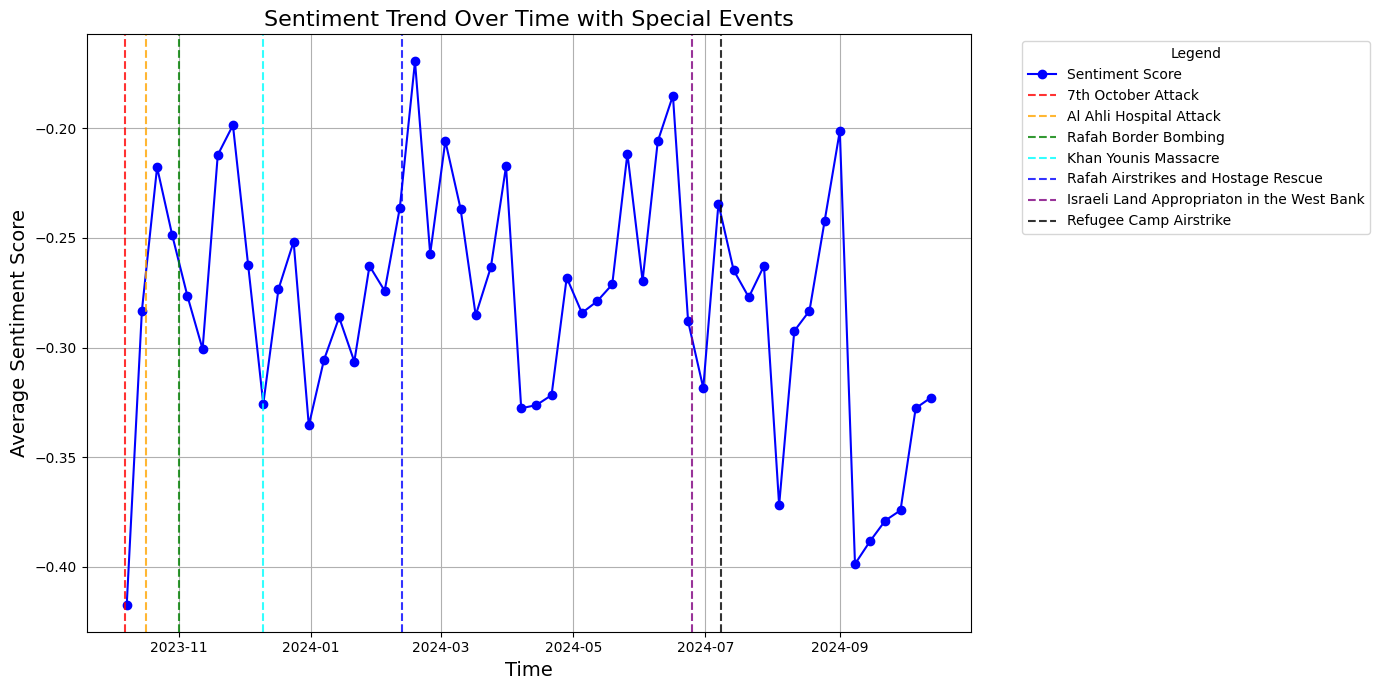

In [167]:
data_cleaned['Publish Date'] = pd.to_datetime(data_cleaned['Publish Date'], errors='coerce')
data_cleaned = data_cleaned.reset_index(drop=True)

# Calculate average sentiment score by week
sentiment_over_time = data_cleaned.resample('W', on='Publish Date')['Sentiment Score'].mean()

# Convert event dates to pandas Timestamps
special_event_dates = {label: (pd.Timestamp(date), color) for label, (date, color) in special_events.items()}

# Plot sentiment over time
plt.figure(figsize=(14, 7))
plt.plot(sentiment_over_time.index, sentiment_over_time.values, marker='o', color='blue', label='Sentiment Score')

# Add vertical lines for special events
for event, (date, color) in special_event_dates.items():
    plt.axvline(x=date, color=color, linestyle='--', alpha=0.8, label=event)

plt.xlabel("Time", fontsize=14)
plt.ylabel("Average Sentiment Score", fontsize=14)
plt.title("Sentiment Trend Over Time with Special Events", fontsize=16)
plt.grid()
plt.legend(title="Legend", fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Sentiment Analysis considering each Actor

At first we need all needed actors and their specific colors identified.

In [168]:
# actors to analyze
actors = {
    "IDF": "IDF",
    "Hamas": "Hamas",
    "Israel": "Israel|Israeli",
    "Gaza": "Gaza"
}

# specific color for each actor
actor_colors = {
    "Israel": "#3a047e",  # Dark purple
    "Gaza": "#fb4b04",    # Bright orange
    "Hamas": "#8f046a",   # Deep magenta
    "IDF": "#c42838"      # Crimson red
}

This section of code performs **sentiment analysis on news headlines**, focusing on specific actors in the Israel-Palestine conflict.

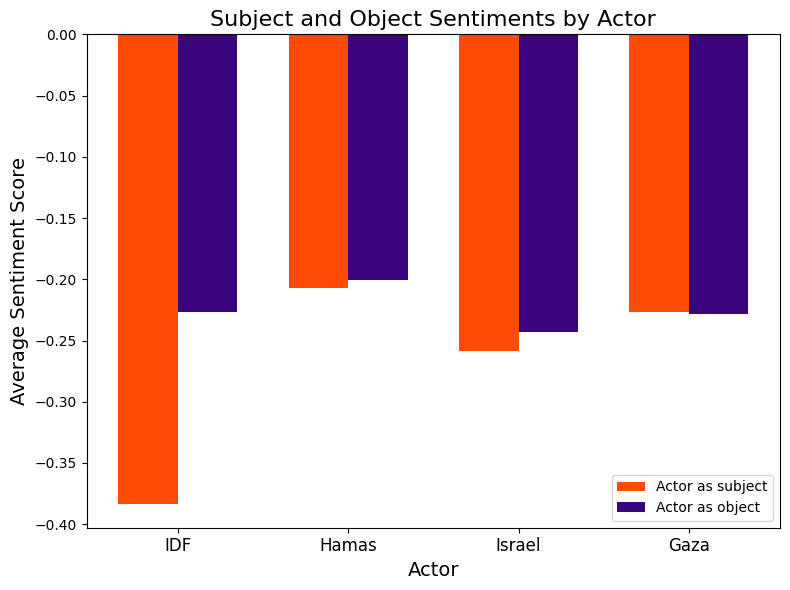

In [169]:
nlp = spacy.load("en_core_web_sm")

def extract_actor_sentiment(headline, actor_keywords):
    """
    Analyzes sentiment for an actor based on whether they are the subject or object in the headline.
    """
    doc = nlp(headline)
    sentiment_scores = {actor: {'subject': [], 'object': []} for actor in actor_keywords.keys()}
    
    for token in doc:
        for actor, keywords in actor_keywords.items():
            if any(keyword.lower() in token.text.lower() for keyword in keywords.split("|")):
                # Check if actor is subject or object
                if token.dep_ in ("nsubj", "nsubjpass"):  # Subject or passive subject
                    sentiment = analyzer.polarity_scores(doc.text)['compound']
                    sentiment_scores[actor]['subject'].append(sentiment)
                elif token.dep_ in ("dobj", "pobj"):  # Direct or prepositional object
                    sentiment = analyzer.polarity_scores(doc.text)['compound']
                    sentiment_scores[actor]['object'].append(sentiment)
    
    # Calculate average sentiment for each actor
    avg_sentiments = {
        actor: {
            'subject_sentiment': sum(scores['subject']) / len(scores['subject']) if scores['subject'] else None,
            'object_sentiment': sum(scores['object']) / len(scores['object']) if scores['object'] else None
        }
        for actor, scores in sentiment_scores.items()
    }
    return avg_sentiments

# Apply the function to extract sentiments for all headlines
actor_sentiments = {actor: {'subject': [], 'object': []} for actor in actors.keys()}

for _, row in data_cleaned.iterrows():
    sentiments = extract_actor_sentiment(row['Title'], actors)
    for actor in actors.keys():
        if sentiments[actor]['subject_sentiment'] is not None:
            actor_sentiments[actor]['subject'].append(sentiments[actor]['subject_sentiment'])
        if sentiments[actor]['object_sentiment'] is not None:
            actor_sentiments[actor]['object'].append(sentiments[actor]['object_sentiment'])

# Calculate average subject and object sentiment for each actor
avg_actor_sentiments = {
    actor: {
        'subject': np.mean(scores['subject']) if scores['subject'] else 0,
        'object': np.mean(scores['object']) if scores['object'] else 0
    }
    for actor, scores in actor_sentiments.items()
}

# Prepare data for plotting
actors_list = list(avg_actor_sentiments.keys())
subject_sentiments = [avg_actor_sentiments[actor]['subject'] for actor in actors_list]
object_sentiments = [avg_actor_sentiments[actor]['object'] for actor in actors_list]

x = np.arange(len(actors_list))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
bar1 = ax.bar(x - width/2, subject_sentiments, width, label='Actor as subject', color='#fb4b04')
bar2 = ax.bar(x + width/2, object_sentiments, width, label='Actor as object', color="#3a047e")
ax.set_xlabel('Actor', fontsize=14)
ax.set_ylabel('Average Sentiment Score', fontsize=14)
ax.set_title('Subject and Object Sentiments by Actor', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(actors_list, fontsize=12)
ax.legend()
plt.tight_layout()
plt.show()

The `special_events_only_dates` dictionary stores key historical events and their corresponding dates in a simple format, ensuring clean and error-free data processing. 

In [170]:
special_events_only_dates = {
    "7th October Attack": "2023-10-07",
    "Al Ahli Hospital Attack": "2023-10-17",
    "Rafah Border Bombing": "2023-11-01",
    "Khan Younis Massacre": "2023-12-10",
    "Rafah Airstrikes and Hostage Rescue": "2024-02-12",
    "Israeli Land Appropriation in the West Bank": "2024-06-25",
    "Refugee Camp Airstrike": "2024-07-08",
}

This section of code performs **sentiment trend analysis over time for key actors** mentioned in news headlines. It identifies whether actors appear as subjects or objects, extracts sentiment scores, and visualizes how sentiment evolves across different time periods.

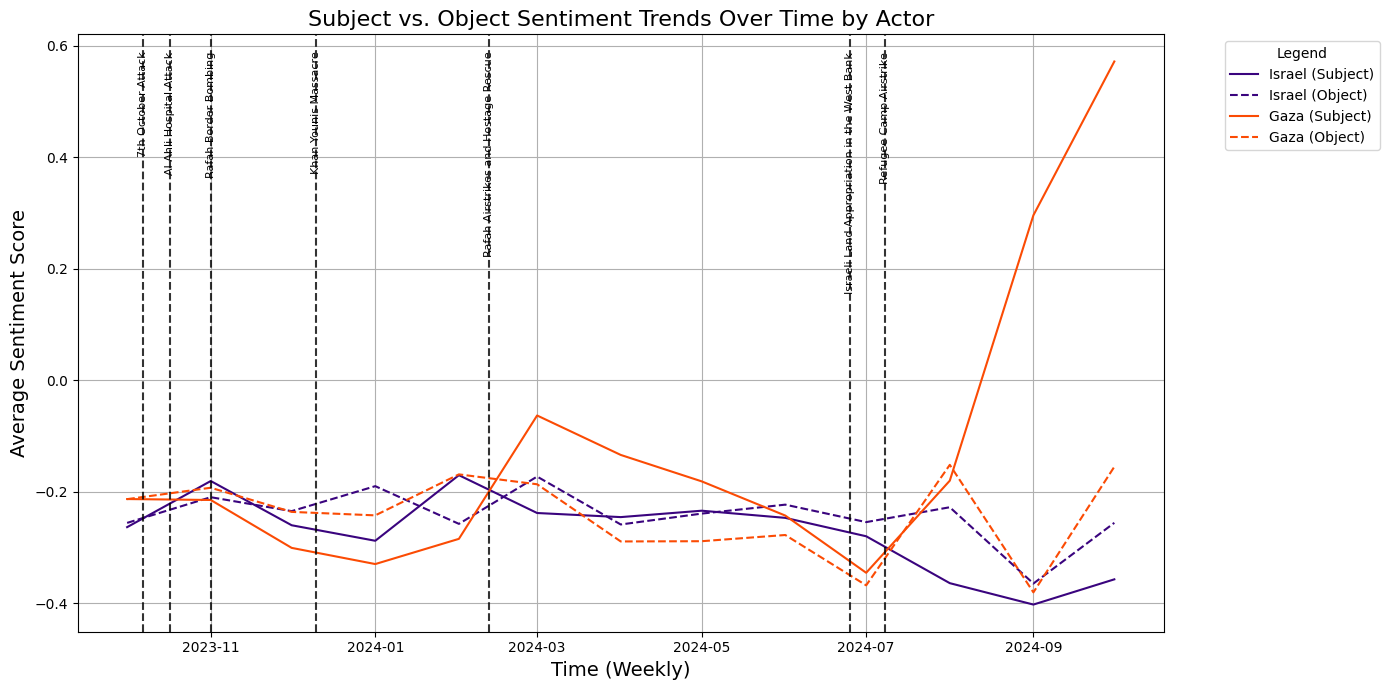

In [171]:
actors_israel_gaza = {
    "Israel": "Israel|Israeli",
    "Gaza": "Gaza"
}

def extract_actor_sentiment(headline, actor_keywords):
    """
    Analyzes sentiment for an actor based on whether they are the subject or object in the headline.
    """
    doc = nlp(headline)
    sentiment_scores = {actor: {'subject': [], 'object': []} for actor in actor_keywords.keys()}
    
    for token in doc:
        for actor, keywords in actor_keywords.items():
            if any(keyword.lower() in token.text.lower() for keyword in keywords.split("|")):
                # Check if actor is subject or object
                if token.dep_ in ("nsubj", "nsubjpass"):  # Subject or passive subject
                    sentiment = analyzer.polarity_scores(doc.text)['compound']
                    sentiment_scores[actor]['subject'].append(sentiment)
                elif token.dep_ in ("dobj", "pobj"):  # Direct or prepositional object
                    sentiment = analyzer.polarity_scores(doc.text)['compound']
                    sentiment_scores[actor]['object'].append(sentiment)
    
    return sentiment_scores

data_cleaned['Publish Date'] = pd.to_datetime(data_cleaned['Publish Date'], errors='coerce')
data_cleaned = data_cleaned.reset_index(drop=True)

sentiments_over_time = []

# Extract sentiments per headline
for _, row in data_cleaned.iterrows():
    actor_sentiments = extract_actor_sentiment(row['Title'], actors_israel_gaza)
    actor_sentiments['date'] = row['Publish Date']
    sentiments_over_time.append(actor_sentiments)

sentiment_data = []

for entry in sentiments_over_time:
    date = entry.pop('date')
    for actor, scores in entry.items():
        sentiment_data.append({
            'date': date,
            'actor': actor,
            'subject_sentiment': np.mean(scores['subject']) if scores['subject'] else None,
            'object_sentiment': np.mean(scores['object']) if scores['object'] else None
        })

sentiment_df = pd.DataFrame(sentiment_data)
sentiment_df.dropna(subset=['subject_sentiment', 'object_sentiment'], how='all', inplace=True)

sentiment_df['week'] = sentiment_df['date'].dt.to_period('M').apply(lambda r: r.start_time)
weekly_sentiment = sentiment_df.groupby(['week', 'actor']).mean().reset_index()

# Plot subject vs. object sentiment over time with custom colors
plt.figure(figsize=(14, 7))

for actor in actors_israel_gaza.keys():
    actor_data = weekly_sentiment[weekly_sentiment['actor'] == actor]
    plt.plot(actor_data['week'], actor_data['subject_sentiment'], label=f'{actor} (Subject)', linestyle='-', color=actor_colors[actor])
    plt.plot(actor_data['week'], actor_data['object_sentiment'], label=f'{actor} (Object)', linestyle='--', color=actor_colors[actor])

# Add vertical lines and text for events
for event, date in special_events_only_dates.items():
    plt.axvline(pd.Timestamp(date), color='black', linestyle='--', alpha=0.8)
    plt.text(pd.Timestamp(date), plt.ylim()[1] * 0.95, event, color='black', fontsize=8, rotation=90,
             verticalalignment='top', horizontalalignment='center')

plt.title("Subject vs. Object Sentiment Trends Over Time by Actor", fontsize=16)
plt.xlabel("Time (Weekly)", fontsize=14)
plt.ylabel("Average Sentiment Score", fontsize=14)
plt.legend(title="Legend", fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()


The following plot shows how the sentiment has changed over time for each media outlet separately. 

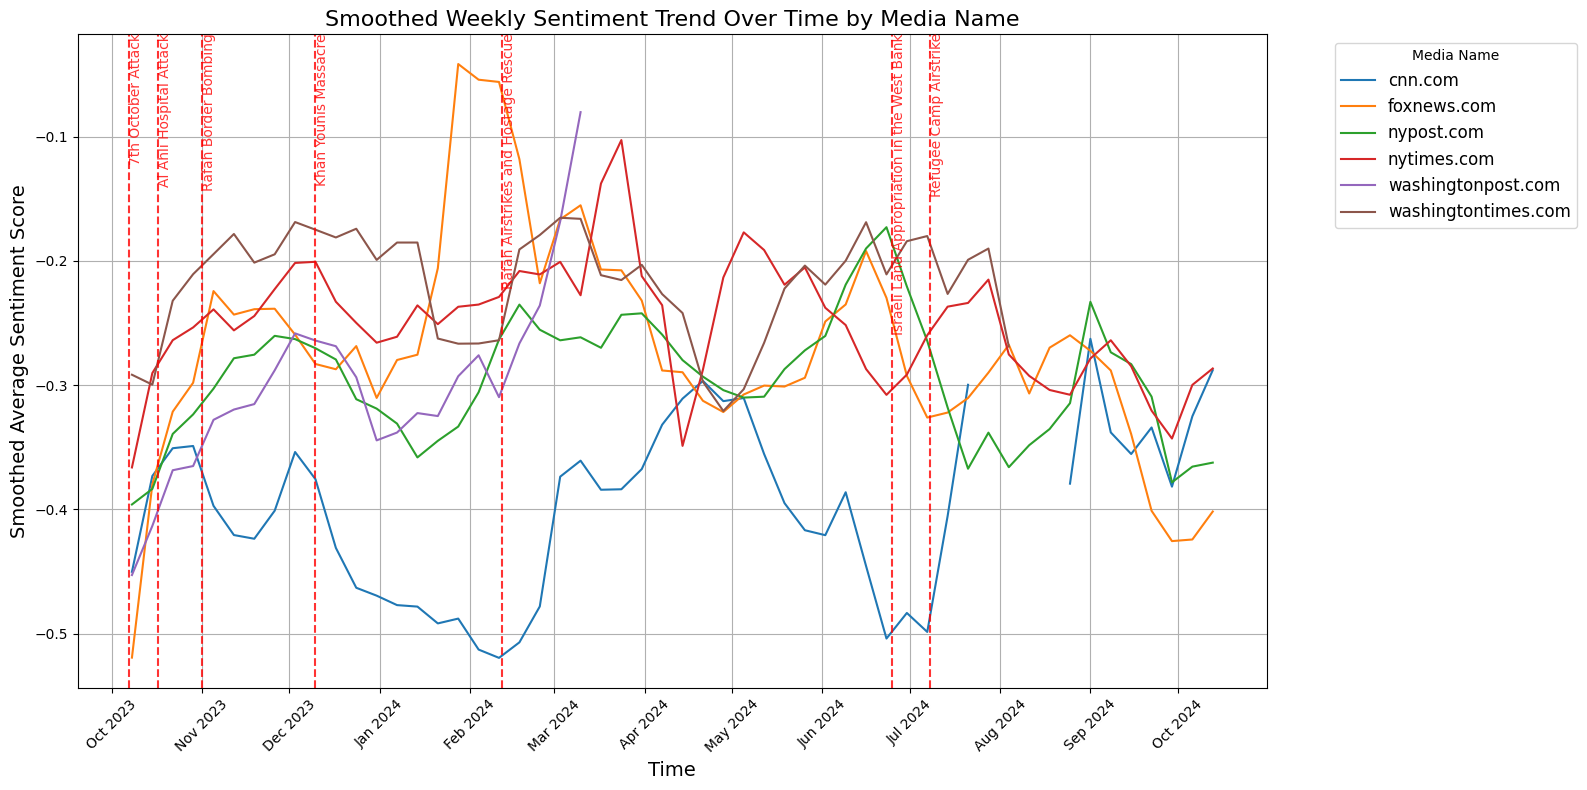

In [172]:
sentiment_weekly = data_cleaned.groupby('Media Name').resample('W', on='Publish Date')['Sentiment Score'].mean()
sentiment_weekly = sentiment_weekly.reset_index()

window_size = 4  # 4-week (approximately one month) moving average
sentiment_weekly['Smoothed Sentiment'] = (
    sentiment_weekly.groupby('Media Name')['Sentiment Score']
    .transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())
)

special_event_dates = {label: pd.Timestamp(date) for label, date in special_events_only_dates.items()}

plt.figure(figsize=(16, 8))

for media_name in sentiment_weekly['Media Name'].unique():
    media_data = sentiment_weekly[sentiment_weekly['Media Name'] == media_name]
    plt.plot(media_data['Publish Date'], media_data['Smoothed Sentiment'], label=media_name)

# Add vertical lines for special events
for event, date in special_event_dates.items():
    plt.axvline(x=date, color='red', linestyle='--', alpha=0.8)
    plt.text(x=date, y=plt.gca().get_ylim()[1] * 0.95, s=event, rotation=90, color='red',
             alpha=0.8, fontsize=10, verticalalignment='top'
    )

plt.xlabel("Time", fontsize=14)
plt.ylabel("Smoothed Average Sentiment Score", fontsize=14)
plt.title("Smoothed Weekly Sentiment Trend Over Time by Media Name", fontsize=16)

plt.legend(
    title="Media Name", 
    fontsize=12, 
    bbox_to_anchor=(1.05, 1), 
    loc='upper left'
)

plt.grid()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The next plot helps visualize how each media outlet covers the Israel-Palestine conflict, categorizing headlines into positive, neutral, or negative sentiments. It provides a clear overview of the tone in which each media outlet reports on the conflict.

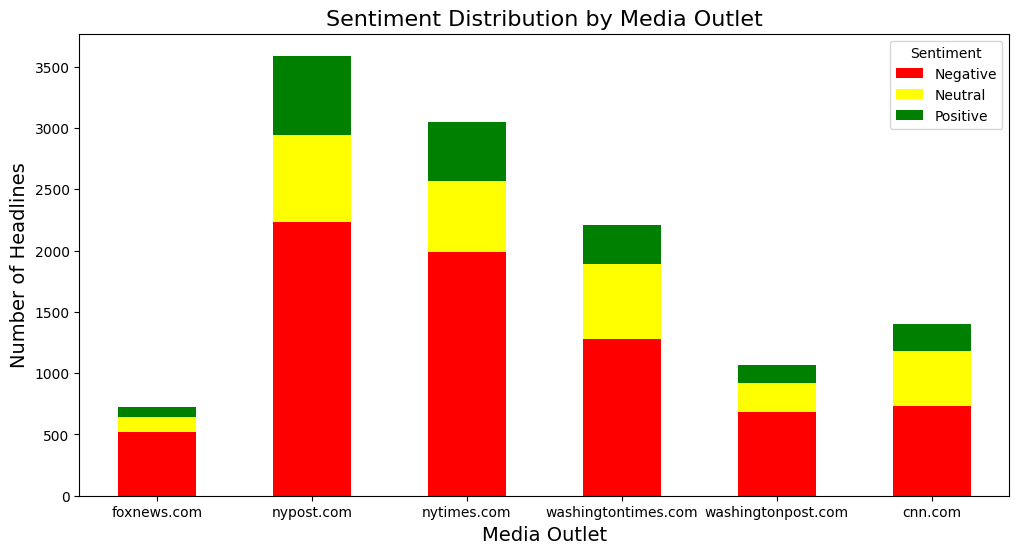

In [176]:
sentiment_colors = {
    'Positive': 'green',
    'Negative': 'red',
    'Neutral': 'yellow'
}

def classify_sentiment(score):
    '''
    Function for the classification of the headlines
    '''
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

data_cleaned['Sentiment Label'] = data_cleaned['Sentiment Score'].apply(classify_sentiment)

#positive, neutral, and negative headlines by media outlet
sentiment_counts = data_cleaned.groupby(['Media Name', 'Sentiment Label']).size().unstack(fill_value=0)

sentiment_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=sentiment_colors)

plt.xlabel("Media Outlet", fontsize=14)
plt.ylabel("Number of Headlines", fontsize=14)
plt.title("Sentiment Distribution by Media Outlet", fontsize=16)
plt.xticks(ticks=np.arange(len(media_counts_conflict)), labels=media_counts_conflict.index, rotation=0)
plt.legend(title="Sentiment")
plt.show()

### Analysis of sentiment regarding different actors

This code part calculates the normalized frequency of mentions of specific actors (e.g., "IDF" and "Hamas") in article titles for each media outlet. It starts by counting the total articles per outlet, then filters and counts titles mentioning each actor. These counts are normalized by dividing by the total article counts for each outlet. The results are combined into a DataFrame, and a bar chart is plotted to compare the normalized frequencies of actor mentions across media outlets, with a legend placed outside the plot.

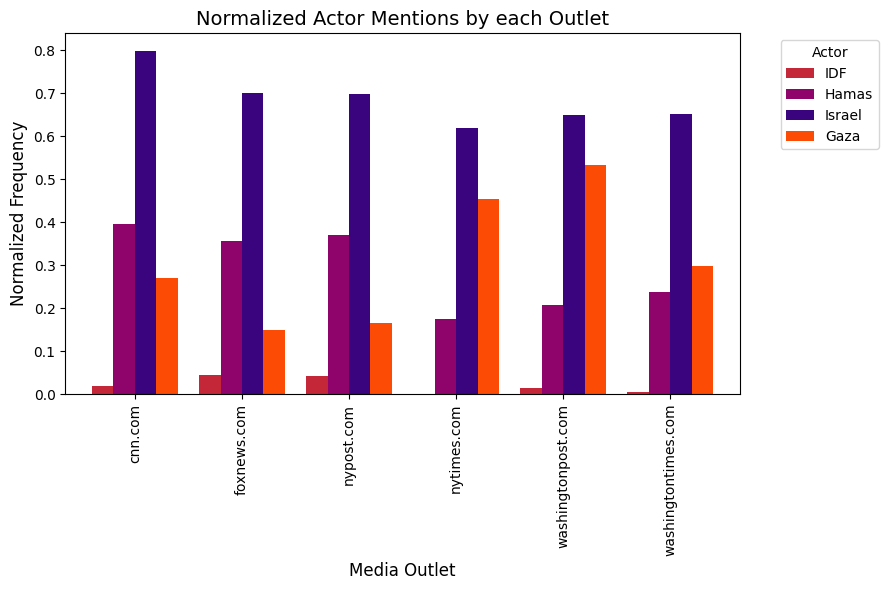

In [177]:
outlet_article_counts = data_cleaned['Media Name'].value_counts().to_dict()

# Calculate normalized actor counts by media outlet
actor_counts = {}
for actor, keyword in actors.items():
    actor_counts[actor] = (
        data_cleaned[data_cleaned['Title'].str.contains(keyword, case=False, na=False)]
        .groupby('Media Name')['Title']
        .count()
        .divide(pd.Series(outlet_article_counts))
    )

actor_counts_df = pd.DataFrame(actor_counts).fillna(0)

ax = actor_counts_df.plot(
    kind='bar', 
    figsize=(9, 6), 
    color=[actor_colors[actor] for actor in actor_counts_df.columns],
    width=0.8
)
plt.title("Normalized Actor Mentions by each Outlet", fontsize=14)
plt.xlabel("Media Outlet", fontsize=12)
plt.ylabel("Normalized Frequency", fontsize=12)
plt.legend(title="Actor", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Mentions of Actors (normalized) - Subject vs Object

This part analyzes how frequently specific actors are mentioned in news headlines. The `count_actor_mentions` function processes each headline, checking if any keywords associated with an actor appear and categorizing mentions based on grammatical roles (subject or object).

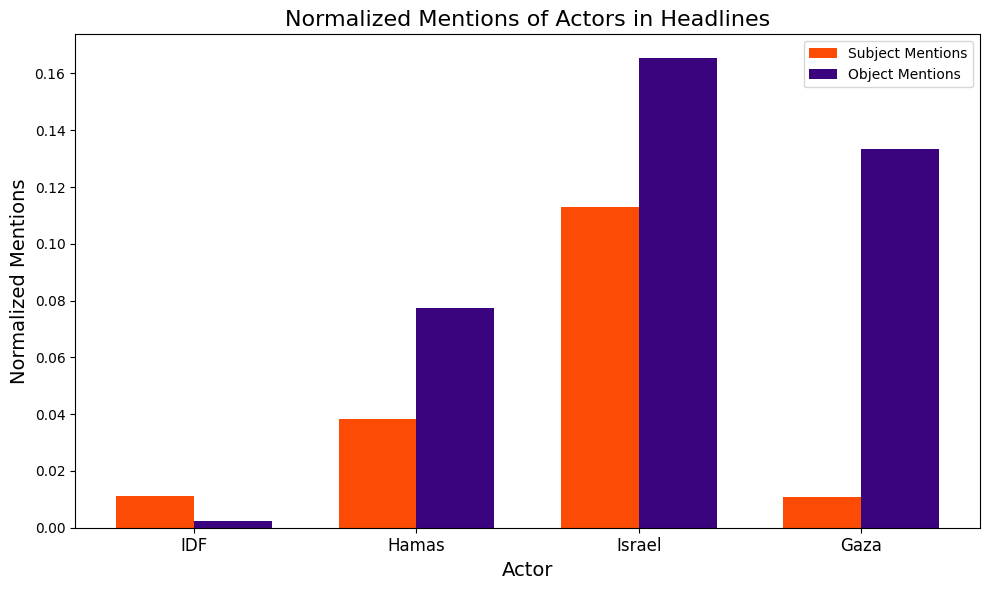

In [178]:
def count_actor_mentions(headline, actor_keywords):
    """
    Counts mentions of actors as subjects, objects, or total in a headline.
    """
    doc = nlp(headline)
    mention_counts = {actor: {'subject': 0, 'object': 0, 'total': 0} for actor in actor_keywords.keys()}
    
    for token in doc:
        for actor, keywords in actor_keywords.items():
            if any(keyword.lower() in token.text.lower() for keyword in keywords.split("|")):
                # Check if actor is subject or object
                if token.dep_ in ("nsubj", "nsubjpass"):  # Subject or passive subject
                    mention_counts[actor]['subject'] += 1
                elif token.dep_ in ("dobj", "pobj"):  # Direct or prepositional object
                    mention_counts[actor]['object'] += 1
                mention_counts[actor]['total'] += 1  # Count every mention
    
    return mention_counts

actor_mentions = {actor: {'subject': 0, 'object': 0, 'total': 0} for actor in actors.keys()}

for _, row in data_cleaned.iterrows():
    mentions = count_actor_mentions(row['Title'], actors)
    for actor in actors.keys():
        actor_mentions[actor]['subject'] += mentions[actor]['subject']
        actor_mentions[actor]['object'] += mentions[actor]['object']
        actor_mentions[actor]['total'] += mentions[actor]['total']

# Normalize mentions by total number of headlines
total_headlines = len(data_cleaned)
normalized_mentions = {
    actor: {
        'subject': count['subject'] / total_headlines,
        'object': count['object'] / total_headlines,
        'total': count['total'] / total_headlines
    }
    for actor, count in actor_mentions.items()
}

actors_list = list(normalized_mentions.keys())
subject_mentions = [normalized_mentions[actor]['subject'] for actor in actors_list]
object_mentions = [normalized_mentions[actor]['object'] for actor in actors_list]

x = np.arange(len(actors_list))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, subject_mentions, width, label='Subject Mentions', color='#fb4b04')
bar2 = ax.bar(x + width/2, object_mentions, width, label='Object Mentions', color="#3a047e")
ax.set_xlabel('Actor', fontsize=14)
ax.set_ylabel('Normalized Mentions', fontsize=14)
ax.set_title('Normalized Mentions of Actors in Headlines', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(actors_list, fontsize=12)
ax.legend()
plt.tight_layout()
plt.show()

### Keyword Frequency
#### Co-occurence of actors and keywords
This code part analyzes the co-occurrence of actors (e.g., "IDF," "Hamas") and keywords (e.g., "Self Defense," "Terrorism") in article headlines. It extracts mentions using predefined patterns, filters for meaningful actor-keyword pairs, and aggregates the results into a co-occurrence matrix. The matrix is visualized as a heatmap, highlighting the frequency of actor-keyword associations and revealing media framing patterns.

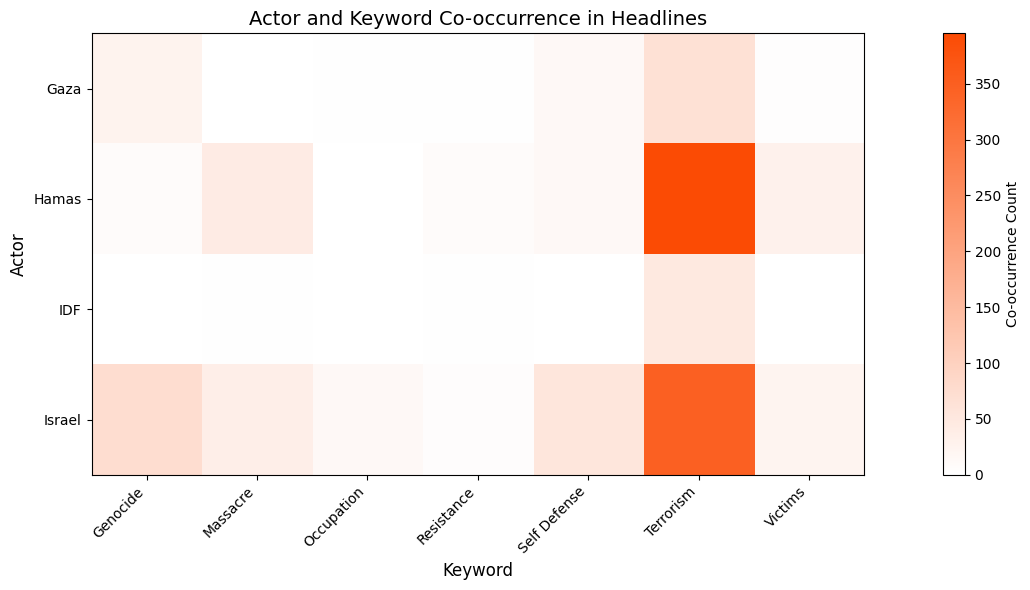

In [179]:
# Keywords to analyze
keywords = {
    "Self Defense": "self-defense|self defence|defense|defence",
    "Terrorism": "terrorist|terrorism|terror",
    "Massacre": "massacre|massacres",
    "Occupation": "occupator|occupation",
    "Resistance": "resistance",
    "Victims": "victim|victims",
    "Genocide": "genocide|genocidal",
    "Civillians": "civillian|civillians"
}

def extract_keywords_and_terms(text, actor_keywords, term_keywords):
    """
    Extract mentions of both actors and terms from the text.
    """
    extracted = []
    for actor, keyword in actor_keywords.items():
        if pd.notnull(text) and pd.Series([k in text for k in keyword.split('|')]).any():
            extracted.append(actor)
    for term, keyword in term_keywords.items():
        if pd.notnull(text) and pd.Series([k in text for k in keyword.split('|')]).any():
            extracted.append(term)
    return extracted

data_cleaned['Extracted Actors and Terms'] = data_cleaned['Title'].apply(
    lambda x: extract_keywords_and_terms(x, actors, keywords)
)

def filter_actor_term_cooccurrences(extracted_entities, actors_list, keywords_list):
    """
    Filters co-occurrences to only include pairs where one entity is an actor and the other is a keyword.
    """
    return [
        (actor, keyword)
        for actor in extracted_entities
        for keyword in extracted_entities
        if actor in actors_list and keyword in keywords_list
    ]

actor_list = list(actors.keys())
keyword_list = list(keywords.keys())

filtered_co_occurrences = Counter(itertools.chain.from_iterable(
    filter_actor_term_cooccurrences(row, actor_list, keyword_list)
    for row in data_cleaned['Extracted Actors and Terms'] if row
))

filtered_co_occurrence_df = pd.DataFrame(
    [(pair[0], pair[1], count) for pair, count in filtered_co_occurrences.items()],
    columns=['Actor', 'Keyword', 'Co-occurrence Count']
)

filtered_co_occurrence_matrix = filtered_co_occurrence_df.pivot(index='Actor', columns='Keyword', values='Co-occurrence Count').fillna(0)

single_color_cmap = LinearSegmentedColormap.from_list("Custom", ["#ffffff", "#fb4b04"])

plt.figure(figsize=(16, 6))
plt.imshow(filtered_co_occurrence_matrix, cmap=single_color_cmap, interpolation='nearest')
plt.colorbar(label="Co-occurrence Count", orientation="vertical")
plt.xticks(range(len(filtered_co_occurrence_matrix.columns)), filtered_co_occurrence_matrix.columns, rotation=45, ha="right")
plt.yticks(range(len(filtered_co_occurrence_matrix.index)), filtered_co_occurrence_matrix.index)
plt.title("Actor and Keyword Co-occurrence in Headlines", fontsize=14)
plt.xlabel("Keyword", fontsize=12)
plt.ylabel("Actor", fontsize=12)
plt.tight_layout()
plt.show()

Now we include Pivot data:

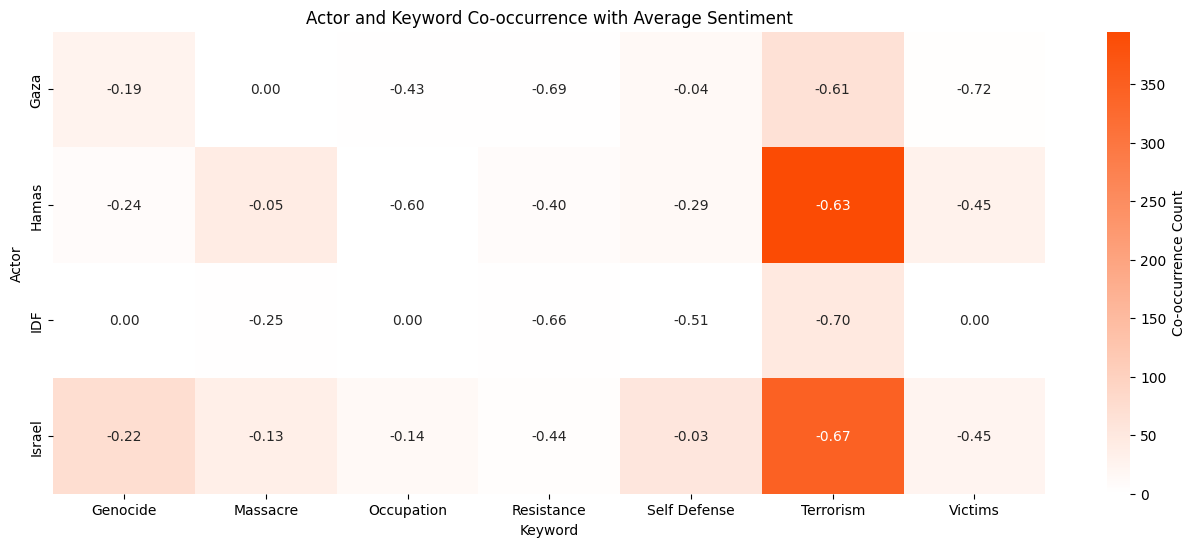

In [180]:
def calculate_sentiment_for_cooccurrences(data, actor_keywords, term_keywords, sentiment_analyzer):
    """
    Calculate sentiment for co-occurrences
    """
    sentiment_data = defaultdict(list)
    for _, row in data.iterrows():
        extracted_entities = row['Extracted Actors and Terms']
        if isinstance(extracted_entities, list) and extracted_entities:
            sentiment = sentiment_analyzer.polarity_scores(row['Title'])['compound']
            for actor in actor_keywords.keys():
                for term in term_keywords.keys():
                    if actor in extracted_entities and term in extracted_entities:
                        sentiment_data[(actor, term)].append(sentiment)
    return {pair: np.mean(scores) for pair, scores in sentiment_data.items()}

# Calculate average sentiment for co-occurrences
average_sentiments = calculate_sentiment_for_cooccurrences(
    data_cleaned, actors, keywords, analyzer
)

combined_data = []
for pair, count in filtered_co_occurrences.items():
    sentiment = average_sentiments.get(pair, np.nan)
    combined_data.append((*pair, count, sentiment))

combined_df = pd.DataFrame(combined_data, columns=['Actor', 'Keyword', 'Co-occurrence Count', 'Average Sentiment'])

count_matrix = combined_df.pivot(index='Actor', columns='Keyword', values='Co-occurrence Count').fillna(0)
sentiment_matrix = combined_df.pivot(index='Actor', columns='Keyword', values='Average Sentiment').fillna(0)

# Plotting the heatmap with overlaid sentiment
plt.figure(figsize=(16, 6))
sns.heatmap(count_matrix, annot=sentiment_matrix, fmt=".2f", cmap=single_color_cmap, cbar_kws={'label': 'Co-occurrence Count'})
plt.title("Actor and Keyword Co-occurrence with Average Sentiment")
plt.xlabel("Keyword")
plt.ylabel("Actor")
plt.show()

### Keyword Analysis

The following visualization helps to highlight the most frequent keywords across media headlines related to the Israel-Palestine conflict. By processing the titles of articles, we extracted the most prominent terms, excluding common stopwords and irrelevant terms. This visualization provides a clear representation of the key themes and topics discussed in the headlines, offering valuable insights into the central narratives surrounding the conflict.

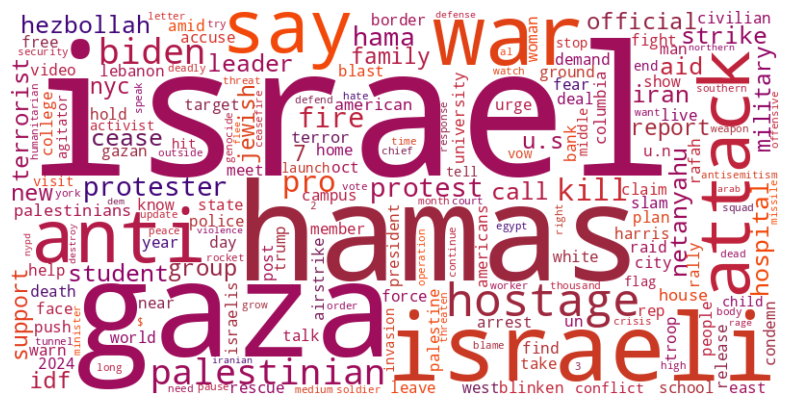

In [182]:
def preprocess_text_spacy(text):
    doc = nlp(text.lower())
    words = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(words)

data_cleaned['Processed Title'] = data_cleaned['Title'].apply(preprocess_text_spacy)

all_words = " ".join(data_cleaned['Processed Title']).split()
word_counts = Counter(all_words)

actor_colors = ["#3a047e", "#fb4b04", "#8f046a", "#c42838"]  # Israel, Gaza, Hamas, IDF
custom_cmap = LinearSegmentedColormap.from_list("ActorPalette", actor_colors)

# Generate WordCloud with custom colors
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap=custom_cmap
).generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

This code creates a bar chart to visualize the top 10 most frequent words in the dataset, with each word assigned a unique color. It includes a custom legend for word-color mapping and adjusts the layout for better readability.

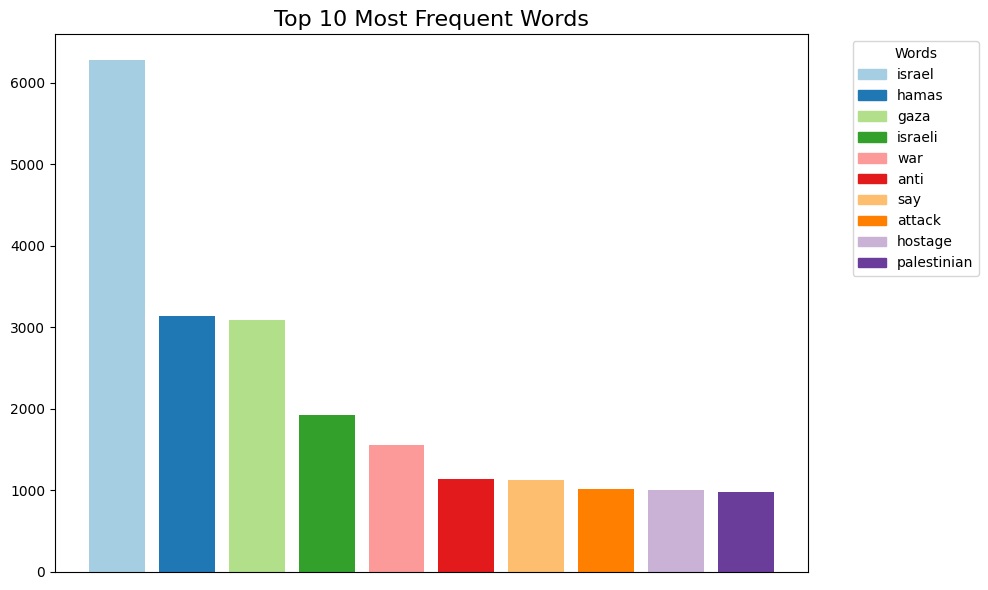

In [183]:
# Get the 10 most common words from the word count dictionary
common_words = word_counts.most_common(10)
words, counts = zip(*common_words)

colors = plt.cm.Paired.colors

frame_color_dict = {frame: color for frame, color in zip(words, colors)}

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color=colors)
plt.xticks([])
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
labels = words
plt.legend(handles, labels, title="Words", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, ncol=1)
plt.title('Top 10 Most Frequent Words', fontsize=16)
plt.tight_layout()
plt.show()

### Framing Analysis

Next we identified several key frames based on language and keywords as following:

    1.War Frame
    2.Political / Leadership Frame
    3.Humanitarian / Victimhood Frame
    4.Ideological / Partisan Frame
    5.Security / Military Justification Frame
    6.International Relations Frame
    7.Protest / Civil Disobedience Frame
    8.Media Framing / Narrative Framing

In [184]:
# Define keyword groups for various frames (themes or narratives)
frame_keywords = {
    "War Frame": ["war", "attack", "kill", "hostage", "strike", "fire", "hezbollah", "iran", "netanyahu"],
    "Political / Leadership Frame": ["biden", "netanyahu", "leader", "call", "pro", "student", "aid"],
    "Humanitarian / Victimhood Frame": ["hospital", "aid", "protest", "protester", "victim", "student", "war"],
    "Ideological / Partisan Frame": ["anti", "pro", "biden", "netanyahu", "hezbollah", "iran"],
    "Security / Military Justification Frame": ["defense", "terrorist", "terror", "kill", "strike", "attack"],
    "International Relations Frame": ["biden", "iran", "hezbollah", "netanyahu", "call", "cease"],
    "Protest / Civil Disobedience Frame": ["protest", "protester", "student", "call"],
    "Media Framing / Narrative Framing": ["biden", "call", "aid", "terrorist", "terror", "strike"]
}

def count_frame_keywords(df, frame_keywords):
    """
    Count the occurrences of frame-related keywords in the dataset
    """
    frame_counts = {frame: 0 for frame in frame_keywords}

    for index, row in df.iterrows():
        # Process the title of each article to prepare it for keyword matching
        processed_title = preprocess_text_spacy(row['Title'])

        # Check each frame and its keywords in the processed title
        for frame, keywords in frame_keywords.items():
            for keyword in keywords:
                if keyword in processed_title:
                    frame_counts[frame] += 1
                    break

    return frame_counts

df = pd.read_csv(cleaned_file_path)
frame_counts = count_frame_keywords(df, frame_keywords)
sorted_frame_counts = sorted(frame_counts.items(), key=lambda x: x[1], reverse=True)
sorted_frames, sorted_counts = zip(*sorted_frame_counts)

print("Sorted frame counts (from largest to smallest):")
for frame, count in sorted_frame_counts:
    print(f"{frame}: {count}")

Sorted frame counts (from largest to smallest):
War Frame: 5594
Ideological / Partisan Frame: 4522
Political / Leadership Frame: 4404
Humanitarian / Victimhood Frame: 4061
Media Framing / Narrative Framing: 2917
International Relations Frame: 2767
Security / Military Justification Frame: 2510
Protest / Civil Disobedience Frame: 1756


This part generates a bar chart visualizing the frequency of keywords associated with different frames. Frames are sorted by frequency in descending order, with distinct colors representing each frame. A legend displays the frame names, while the x-axis labels are omitted for a cleaner visualization.

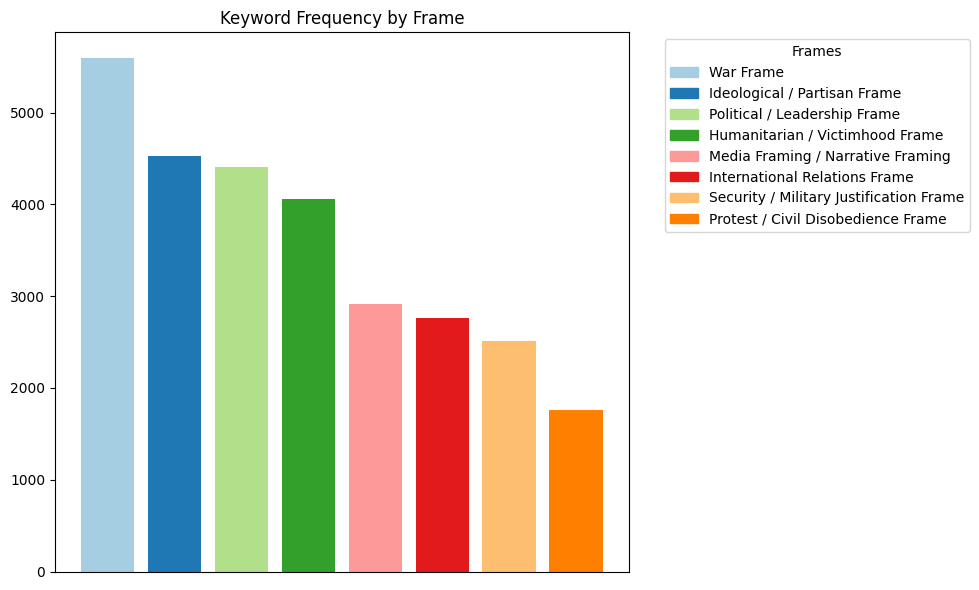

In [185]:
frames = list(frame_counts.keys())
counts = list(frame_counts.values())

frame_count_pairs = list(zip(frames, counts))

sorted_frame_count_pairs = sorted(frame_count_pairs, key=lambda x: x[1], reverse=True)
sorted_frames, sorted_counts = zip(*sorted_frame_count_pairs)

sorted_colors = plt.cm.Paired.colors[:len(sorted_frames)]

plt.figure(figsize=(10, 6))
plt.bar(sorted_frames, sorted_counts, color=sorted_colors)
plt.xticks([])
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in sorted_colors]
plt.legend(handles, sorted_frames, title="Frames", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Keyword Frequency by Frame')
plt.tight_layout()
plt.show()

Here we visualize the percentage distribution of keyword frequencies across frames using a pie chart. Frames are sorted by percentage, with each slice representing a frame labeled with its name and percentage, highlighting the most prominent frames in the text.

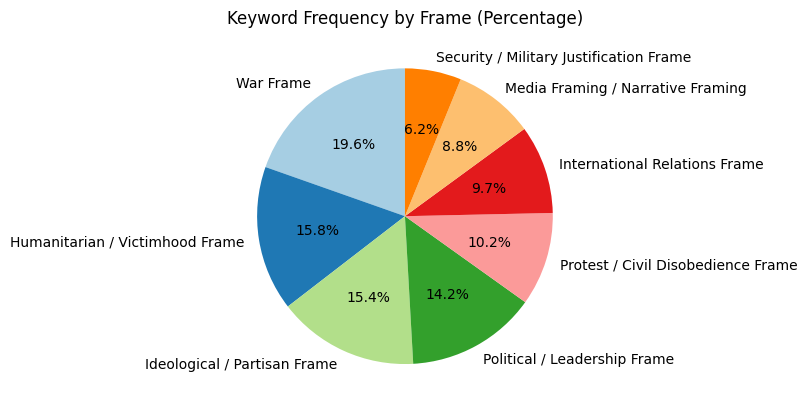

In [186]:
total_count = sum(counts)
percentages = [(count / total_count) * 100 for count in counts]
frame_percentage_pairs = list(zip(sorted_frames, percentages))

# Sort the frames and their percentages in descending order based on percentage
sorted_frame_percentage_pairs = sorted(frame_percentage_pairs, key=lambda x: x[1], reverse=True)

# Unpack the sorted frame names and percentages for further use or plotting
sorted_frames, sorted_percentages = zip(*sorted_frame_percentage_pairs)

plt.pie(sorted_percentages, labels=sorted_frames, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Keyword Frequency by Frame (Percentage)')
plt.show()

## **Event Salience: Coverage vs. Casualties**

This part of our project processes data from our chosen media outlets and performs event analysis based on our dictionary `special_events_only_dates`. It cleans and combines the data, then analyzes articles related to special events by counting how many articles mention related keywords, calculating the normalized article count, and determining the average sentiment score for these articles.

Number of entries for foxnews.com: 52599
Number of entries for cnn.com: 9351
Number of entries for nypost.com: 71485
Number of entries for nytimes.com: 43011
Number of entries for washingtonpost.com: 16747
Number of entries for washingtontimes.com: 29683


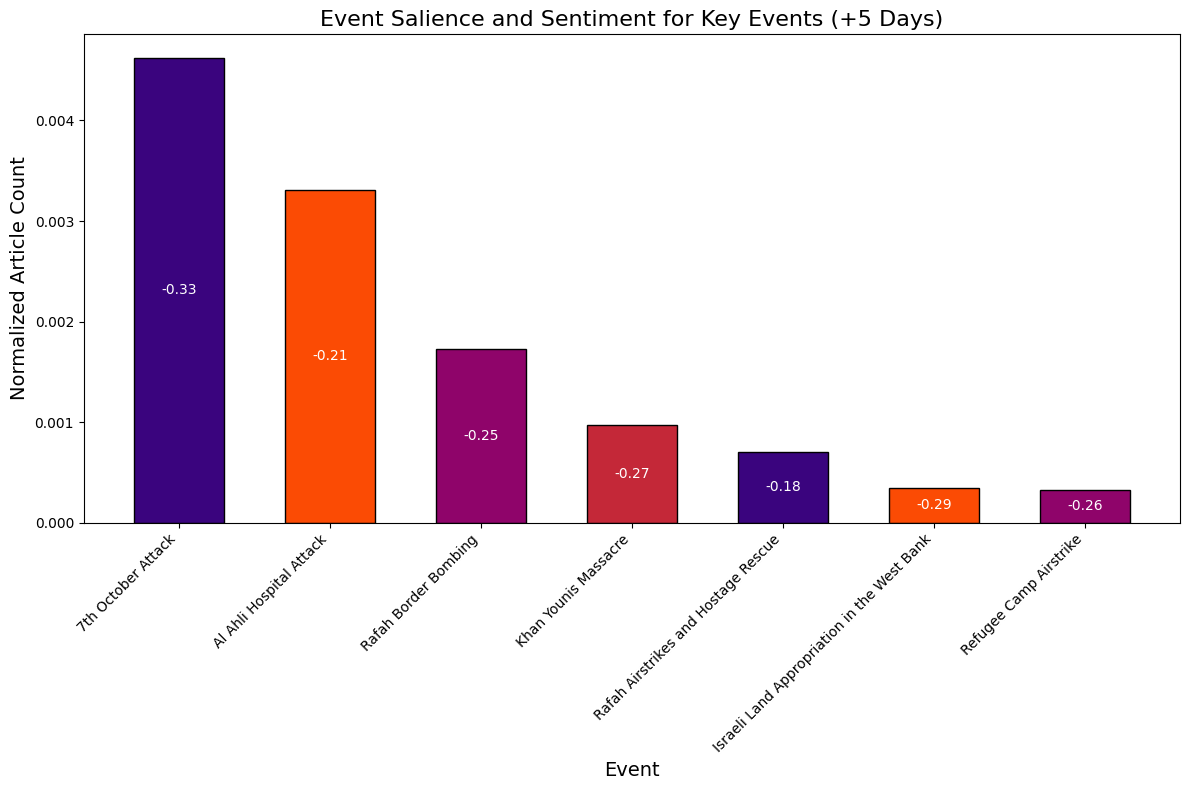

In [188]:
# File paths for the media outlets
file_paths = {
    "Fox": fox_file_path,
    "CNN": cnn_file_path,
    "NY Post": nypost_file_path,
    "NY Times": nytimes_file_path,
    "Washington Post": washingtonpost_file_path,
    "Washington Times": washingtontimes_file_path
}

media_cleaned = {name: clean_media_data(path)[0] for name, path in file_paths.items()}

data_combined = pd.concat(media_cleaned.values())
data_combined['Publish Date'] = pd.to_datetime(data_combined['Publish Date'])

# Prepare data for event salience and sentiment analysis
event_analysis = []

for event_name, event_date in special_events_only_dates.items():
    event_date = pd.to_datetime(event_date)
    time_frame = (data_cleaned['Publish Date'] >= event_date) & \
                 (data_cleaned['Publish Date'] <= event_date + pd.Timedelta(days=5))
    event_data = data_cleaned[time_frame]

    relevant_articles = event_data[
        event_data['Title'].str.contains(r'israel|palestine|gaza|hamas', case=False, na=False)
    ]

    article_count = len(relevant_articles)
    normalized_count = article_count / len(data_combined)
    avg_sentiment = relevant_articles['Title'].apply(lambda x: analyzer.polarity_scores(x)['compound']).mean()
    
    event_analysis.append({
        "Event": event_name,
        "Normalized Article Count": normalized_count,
        "Average Sentiment": avg_sentiment
    })

event_analysis_df = pd.DataFrame(event_analysis)

plt.figure(figsize=(12, 8))
bars = plt.bar(event_analysis_df['Event'], event_analysis_df['Normalized Article Count'], color=event_colors,
               edgecolor='black', width=0.6)

for bar, sentiment in zip(bars, event_analysis_df['Average Sentiment']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f"{sentiment:.2f}",
             ha='center', va='center', fontsize=10, color='white')

plt.title("Event Salience and Sentiment for Key Events (+5 Days)", fontsize=16)
plt.xlabel("Event", fontsize=14)
plt.ylabel("Normalized Article Count", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Here we calculate the average sentiment for articles published around special events within a 5-day window. It filters the articles by event date, computes the average sentiment, and visualizes the results in a bar chart, showing how sentiment varies around these significant events.

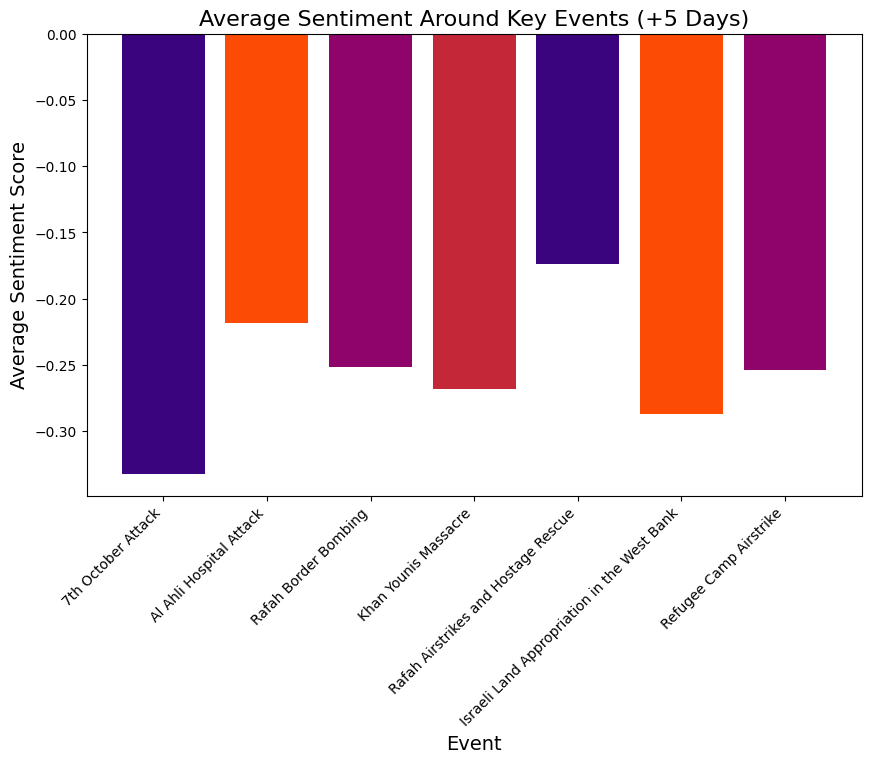

In [189]:
event_sentiments = []

for event_name, event_date in special_events_only_dates.items():
    event_date = pd.to_datetime(event_date)
    time_frame = (data_cleaned['Publish Date'] >= event_date) & (data_cleaned['Publish Date'] <= event_date + pd.Timedelta(days=5))
    event_data = data_cleaned[time_frame]
    
    avg_sentiment = event_data['Title'].apply(lambda x: analyzer.polarity_scores(x)['compound']).mean()
    event_sentiments.append({"Event": event_name, "Date": event_date, "Average Sentiment": avg_sentiment})

event_sentiments_df = pd.DataFrame(event_sentiments)

event_colors = ['#3a047e', '#fb4b04', '#8f046a', '#c42838', '#3a047e', '#fb4b04', '#8f046a']

plt.figure(figsize=(10, 6))
plt.bar(event_sentiments_df['Event'], event_sentiments_df['Average Sentiment'], color=event_colors)
plt.title("Average Sentiment Around Key Events (+5 Days)", fontsize=16)
plt.xlabel("Event", fontsize=14)
plt.ylabel("Average Sentiment Score", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

This part creates a figure with a combination of a bar chart and a line plot to visualize the relationship between event salience (measured by the normalized article count) and sentiment for specific events.

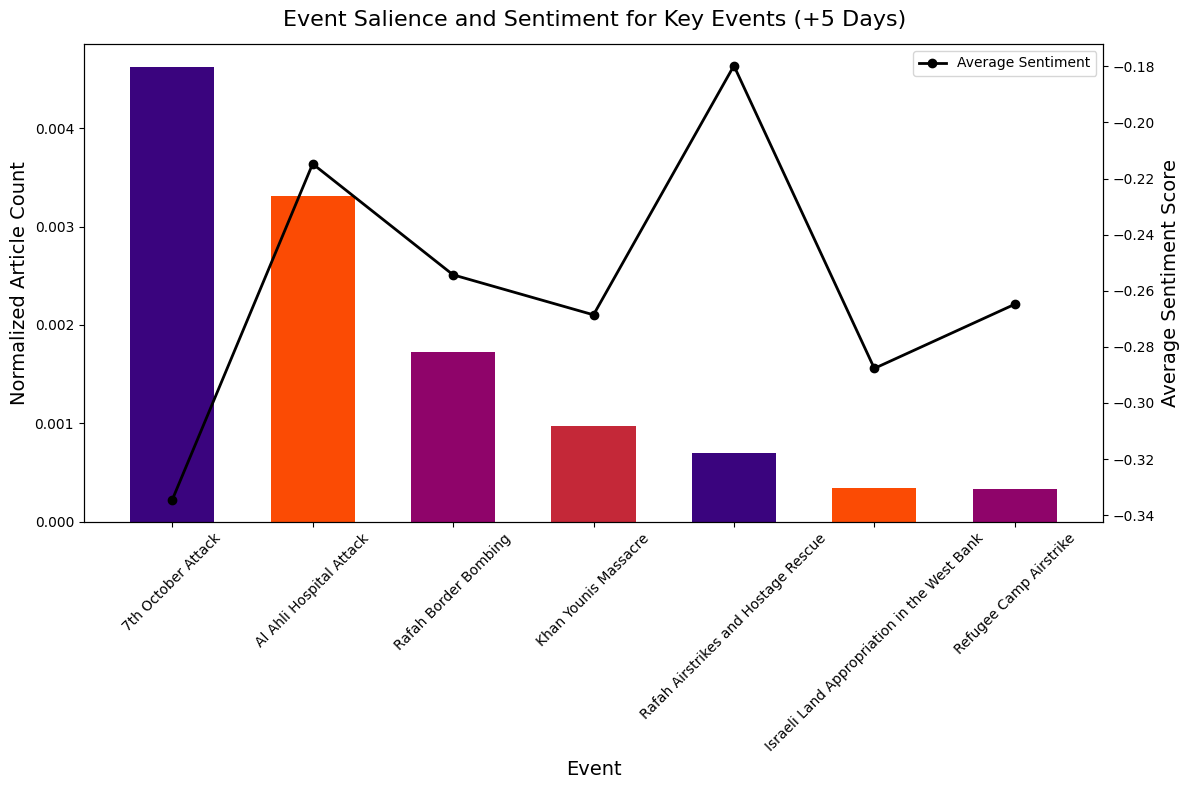

In [190]:
fig, ax1 = plt.subplots(figsize=(12, 8))
bars = ax1.bar(event_analysis_df['Event'], event_analysis_df['Normalized Article Count'], color=event_colors, width=0.6)
ax1.set_xlabel("Event", fontsize=14)
ax1.set_ylabel("Normalized Article Count", fontsize=14)
ax1.tick_params(axis='y')
ax1.tick_params(axis='x', rotation=45)


ax2 = ax1.twinx()
ax2.plot(event_analysis_df['Event'], event_analysis_df['Average Sentiment'], color='black',
         marker='o', linewidth=2, label='Average Sentiment')
ax2.set_ylabel("Average Sentiment Score", fontsize=14, color='black')
ax2.tick_params(axis='y', labelcolor='black')
fig.suptitle("Event Salience and Sentiment for Key Events (+5 Days)", fontsize=16)
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()


This code creates a **scatter plot** to display the relationship between the sentiment of key events and the number of articles written about them. Each event is represented by a bubble, with the size of the bubble showing how many articles were published and the position on the y-axis showing the average sentiment for that event. 

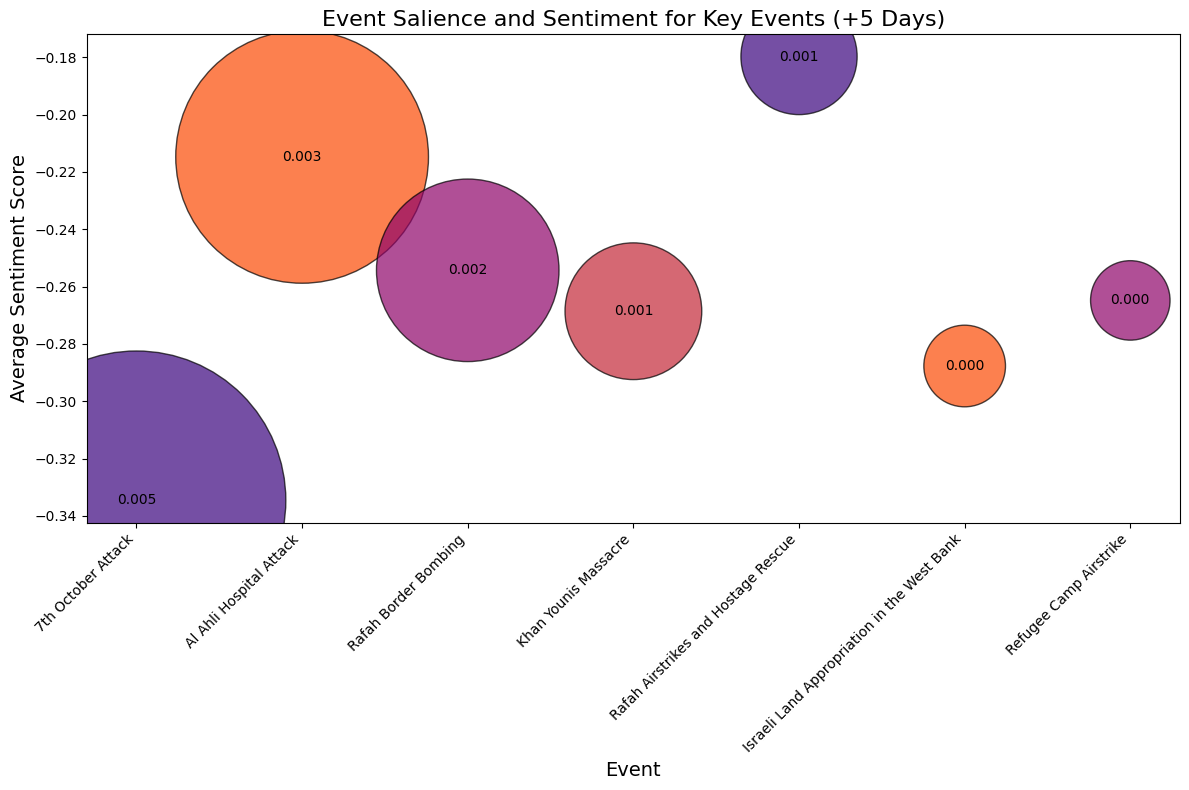

In [191]:
plt.figure(figsize=(12, 8))
plt.scatter(event_analysis_df['Event'], event_analysis_df['Average Sentiment'], s=event_analysis_df['Normalized Article Count'] * 10000000,
            color=event_colors, alpha=0.7, edgecolors='black')
plt.title("Event Salience and Sentiment for Key Events (+5 Days)", fontsize=16)
plt.xlabel("Event", fontsize=14)
plt.ylabel("Average Sentiment Score", fontsize=14)
plt.xticks(rotation=45, ha='right')

# Annotate bubbles with normalized article counts
for i, row in event_analysis_df.iterrows():
    plt.text(
        row['Event'], row['Average Sentiment'],
        f"{row['Normalized Article Count']:.3f}",
        fontsize=10, ha='center', va='center'
    )

plt.tight_layout()
plt.show()

This last code snippet generates a horizontal bar chart to visualize the number of articles written about key events, with each bar representing an event. The length of each bar shows how many articles were written about that event.

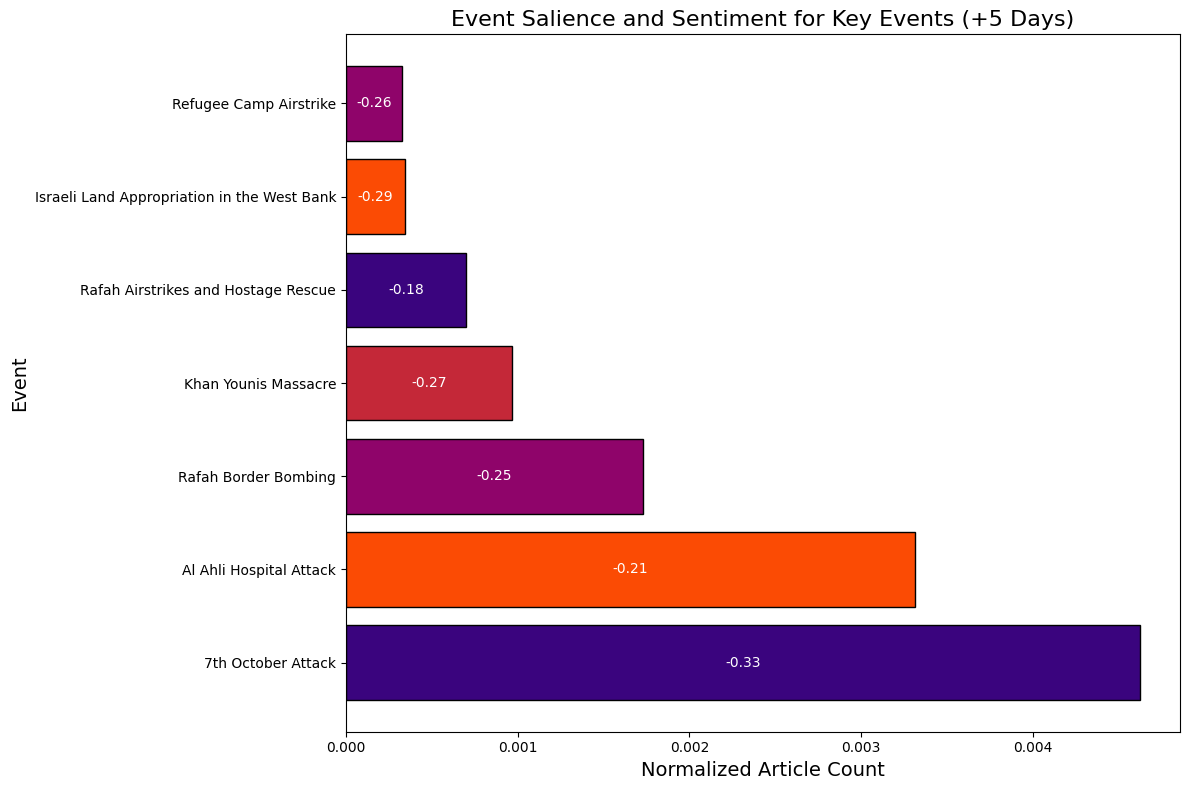

In [192]:
plt.figure(figsize=(12, 8))
bars = plt.barh(event_analysis_df['Event'], event_analysis_df['Normalized Article Count'], color=event_colors, edgecolor='black')

# Annotate bars with sentiment
for bar, sentiment in zip(bars, event_analysis_df['Average Sentiment']):
    plt.text(
        bar.get_width() / 2, bar.get_y() + bar.get_height() / 2,
        f"{sentiment:.2f}",
        ha='center', va='center', fontsize=10, color='white'
    )

plt.title("Event Salience and Sentiment for Key Events (+5 Days)", fontsize=16)
plt.xlabel("Normalized Article Count", fontsize=14)
plt.ylabel("Event", fontsize=14)
plt.tight_layout()
plt.show()